In [1]:
import pandas as pd

In [2]:
df = pd.read_pickle("data/dataframe.pkl")
df.head()

,id,label,tweet,clean_tweet,Hash words,clean_tweet2,corrected_tweet
0,1,0,@user when a father is dysfunctional and is s...,father dysfunct selfish drag kid dysfunction. ...,#run,when a father is dysfunctional and is so selfi...,father dysfunct selfish drag kid dysfunct run
1,2,0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit can't use caus offer wheelc...,#lyft #disapointed #getthanked,thanks for lyft credit i can t use cause they ...,thank left credit use caus offer wheelchair va...
2,3,0,bihday your majesty,bihday majesti,No hashtags,bihday your majesty,day majesti
3,4,0,#model i love u take with u all the time in ...,#model love take time urd+-!!! dddd d|d|d|,#model,model i love you take with you all the time in...,model love take time ord add
4,5,0,factsguide: society now #motivation,factsguide: societi #motiv,#motivation,factsguide society now motivation,fact guid societi motiv


In [3]:
import numpy as np

In [4]:
#df = df.iloc[:,[1,3,6]]
df = df.iloc[:,[1,6]]
df.head()

,label,corrected_tweet
0,0,father dysfunct selfish drag kid dysfunct run
1,0,thank left credit use caus offer wheelchair va...
2,0,day majesti
3,0,model love take time ord add
4,0,fact guid societi motiv


In [5]:
df.head()

,label,corrected_tweet
0,0,father dysfunct selfish drag kid dysfunct run
1,0,thank left credit use caus offer wheelchair va...
2,0,day majesti
3,0,model love take time ord add
4,0,fact guid societi motiv


In [6]:
df.shape

(31962, 2)

In [7]:
dff = df.drop(['label'], axis = 1)

In [122]:
dff.head()

,corrected_tweet
0,father dysfunct selfish drag kid dysfunct run
1,thank left credit use caus offer wheelchair va...
2,day majesti
3,model love take time ord add
4,fact guid societi motiv


In [9]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(dff, list(df.label), test_size=0.1)

In [10]:
X_test.shape

(3197, 1)

In [11]:
X_temp.shape

(28765, 1)

In [12]:
len(y_test)

3197

In [13]:
type(y_temp)

list

In [14]:
X_temp['label'] = np.array(y_temp)

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
X_temp

,corrected_tweet,label
12376,thank coffe thank posit,0
27304,break time dom life new work break near relax ...,0
28477,ash like friday within reach danc escap sitter...,0
17794,watertight way keep cool summer child kid fami...,0
10838,throw back sta mrssa2016 journey brave throwba...,0
...,...,...
19155,hot new releas swiftli sharpen fang radicalis ...,1
12228,excit robin wood activ weekend see tomorrow ea...,0
11171,got shout inst gram,0
15125,pal drive ugh,0


In [16]:
#X_temp.at[16656,'label']

In [17]:
type(X_temp)

pandas.core.frame.DataFrame

In [18]:
nonhate = X_temp[X_temp['label'] == 0]

In [19]:
nonhate.head()

,corrected_tweet,label
12376,thank coffe thank posit,0
27304,break time dom life new work break near relax ...,0
28477,ash like friday within reach danc escap sitter...,0
17794,watertight way keep cool summer child kid fami...,0
10838,throw back sta mrssa2016 journey brave throwba...,0


In [20]:
hate = X_temp[X_temp.label == 1]

In [21]:
hate.shape[0]

1996

In [22]:
nonhatesample = nonhate.sample(n = hate.shape[0])

In [23]:
nonhatesample.head()

,corrected_tweet,label
5866,theoriz milkshak arriv cool open strawberri or...,0
4245,tourism gorilla simul need adapt environ need ...,0
25597,night armando fun friend drink beach,0
27784,grate today gratitud life good love,0
19653,sponsor proud sat juli,0


In [24]:
nonhatesample.shape

(1996, 2)

In [25]:
ds = pd.concat([hate, nonhatesample], axis = 0)

In [26]:
ds.tail()

,corrected_tweet,label
8758,prepar underway,0
572,good morn internationaldayofyoga2016 yoga love...,0
19606,prayer victim famili affect orlando shoot viol...,0
12246,euro star today,0
27606,bless babi estim percent babi syndrom abod,0


In [27]:
ds.shape

(3992, 2)

In [28]:
ds.to_pickle('data/trainset.pkl')

In [29]:
ds = pd.read_pickle('data/trainset.pkl')

In [30]:
ds.head()

,corrected_tweet,label
28406,order sound realli great book,1
3324,allah oil market crash march greenspan cut int...,1
28391,racist attack three muslim woman hull citi cen...,1
15206,allah oil term jihad highli contest concept te...,1
4259,bear rapaci hunger oil also seal doom allah oi...,1


In [31]:
ds_temp = ds

In [32]:
testdf = X_test
testdf['label'] = y_test

c:\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [33]:
testdf

,corrected_tweet,label
25894,show got australian shitti thing,1
21089,innov award go dan sonora ns32016,0
26046,retreat leah darrow countri desper kill child ...,0
23868,tri flower band u pose,0
29523,happi work thursday work smile blue oasi loung,0
...,...,...
9826,grown men get offend hilari pussi,0
19198,arm day donat plasma octopharmaplasmacent gods...,0
15174,lost lb week got slimmer week dad yeah,0
21305,look dog take make happi food load love,0


In [34]:
testdf.shape

(3197, 2)

In [35]:
ds = pd.concat([ds_temp, testdf], axis = 0)

In [36]:
ds.head()

,corrected_tweet,label
28406,order sound realli great book,1
3324,allah oil market crash march greenspan cut int...,1
28391,racist attack three muslim woman hull citi cen...,1
15206,allah oil term jihad highli contest concept te...,1
4259,bear rapaci hunger oil also seal doom allah oi...,1


In [37]:
ds.shape

(7189, 2)

In [38]:
testdf.head()

,corrected_tweet,label
25894,show got australian shitti thing,1
21089,innov award go dan sonora ns32016,0
26046,retreat leah darrow countri desper kill child ...,0
23868,tri flower band u pose,0
29523,happi work thursday work smile blue oasi loung,0


In [39]:
list(testdf.index)

[25894,
 21089,
 26046,
 23868,
 29523,
 11058,
 2104,
 22974,
 23413,
 24945,
 10727,
 16464,
 20917,
 11223,
 22298,
 20211,
 9012,
 218,
 15955,
 28064,
 3138,
 14379,
 5155,
 30809,
 28556,
 30893,
 12998,
 24866,
 665,
 31471,
 21953,
 28711,
 12654,
 22288,
 474,
 28394,
 30078,
 10265,
 16421,
 4483,
 2844,
 1914,
 20021,
 27637,
 26951,
 30113,
 26513,
 23188,
 28007,
 30003,
 26385,
 29785,
 30114,
 31114,
 4992,
 17076,
 10836,
 10650,
 16599,
 10812,
 30998,
 7971,
 20311,
 2413,
 18378,
 4480,
 19605,
 15195,
 9379,
 24198,
 29126,
 25579,
 21128,
 18677,
 26180,
 11482,
 15888,
 13450,
 12750,
 22670,
 22515,
 19185,
 16491,
 25275,
 8527,
 1069,
 13756,
 5285,
 25342,
 8319,
 8480,
 29953,
 26150,
 3033,
 4830,
 6948,
 556,
 4928,
 5055,
 17767,
 14284,
 27093,
 10927,
 704,
 25213,
 5690,
 12783,
 20671,
 24686,
 2613,
 8726,
 5557,
 4329,
 16782,
 12562,
 30193,
 27565,
 19869,
 17643,
 6456,
 18214,
 20078,
 25837,
 24785,
 3648,
 15691,
 24805,
 28779,
 458,
 21095,
 

In [40]:
ds

,corrected_tweet,label
28406,order sound realli great book,1
3324,allah oil market crash march greenspan cut int...,1
28391,racist attack three muslim woman hull citi cen...,1
15206,allah oil term jihad highli contest concept te...,1
4259,bear rapaci hunger oil also seal doom allah oi...,1
...,...,...
9826,grown men get offend hilari pussi,0
19198,arm day donat plasma octopharmaplasmacent gods...,0
15174,lost lb week got slimmer week dad yeah,0
21305,look dog take make happi food load love,0


In [41]:
corpus = []
for i in range(ds.shape[0]):
    corpus.append(ds.iloc[i][0])

In [85]:
type(corpus)

list

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [120]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
feature_names = vectorizer.get_feature_names()
dense = X.todense()
denselist = dense.tolist()
df2 = pd.DataFrame(denselist, columns=feature_names)
df2

,090531156,11thmonthsari,13479,150202,1stsoloalbumleejonghyun,2016in4a,2016in4word,2016in4worda,2016in4wordsa,2016in4world,...,zodiac,zoe,zone,zoo,zoom,zoon,zorro,zucchini,zurich,zzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
feature_names

['090531156',
 '11thmonthsari',
 '13479',
 '150202',
 '1stsoloalbumleejonghyun',
 '2016in4a',
 '2016in4word',
 '2016in4worda',
 '2016in4wordsa',
 '2016in4world',
 '2016macaugift',
 '2017in3word',
 '2017in3wordsa',
 '220skinnywrap',
 '26551',
 '40404',
 '49287',
 '564943',
 '5hardweeksuntilsummerd',
 '5secondsofsummerconc',
 '5wordtrumplethinskin',
 '8monthbflovepa1',
 'aah',
 'aarhu',
 'ab',
 'aba',
 'abandon',
 'abasel2016a',
 'abb',
 'abba',
 'abbi',
 'abc',
 'abduct',
 'abe',
 'aberdeen',
 'aberr',
 'abet',
 'abil',
 'abl',
 'abod',
 'abraham',
 'abroad',
 'absenc',
 'absolut',
 'abstract',
 'absurd',
 'abuja',
 'abund',
 'abus',
 'academi',
 'academia',
 'acc',
 'accent',
 'accept',
 'access',
 'accessori',
 'accid',
 'accident',
 'accolad',
 'accomplish',
 'accord',
 'account',
 'acct',
 'accur',
 'accuraci',
 'accus',
 'ach',
 'achiev',
 'achil',
 'achoo',
 'achromat',
 'aci',
 'acid',
 'acknowledg',
 'acn',
 'acoust',
 'acquaint',
 'across',
 'act',
 'actin',
 'action',
 'activ'

In [45]:
# save vectorizer X
vectorizer.get_feature_names()

['090531156',
 '11thmonthsari',
 '13479',
 '150202',
 '1stsoloalbumleejonghyun',
 '2016in4a',
 '2016in4word',
 '2016in4worda',
 '2016in4wordsa',
 '2016in4world',
 '2016macaugift',
 '2017in3word',
 '2017in3wordsa',
 '220skinnywrap',
 '26551',
 '40404',
 '49287',
 '564943',
 '5hardweeksuntilsummerd',
 '5secondsofsummerconc',
 '5wordtrumplethinskin',
 '8monthbflovepa1',
 'aah',
 'aarhu',
 'ab',
 'aba',
 'abandon',
 'abasel2016a',
 'abb',
 'abba',
 'abbi',
 'abc',
 'abduct',
 'abe',
 'aberdeen',
 'aberr',
 'abet',
 'abil',
 'abl',
 'abod',
 'abraham',
 'abroad',
 'absenc',
 'absolut',
 'abstract',
 'absurd',
 'abuja',
 'abund',
 'abus',
 'academi',
 'academia',
 'acc',
 'accent',
 'accept',
 'access',
 'accessori',
 'accid',
 'accident',
 'accolad',
 'accomplish',
 'accord',
 'account',
 'acct',
 'accur',
 'accuraci',
 'accus',
 'ach',
 'achiev',
 'achil',
 'achoo',
 'achromat',
 'aci',
 'acid',
 'acknowledg',
 'acn',
 'acoust',
 'acquaint',
 'across',
 'act',
 'actin',
 'action',
 'activ'

,090531156,11thmonthsari,13479,150202,1stsoloalbumleejonghyun,2016in4a,2016in4word,2016in4worda,2016in4wordsa,2016in4world,...,zodiac,zoe,zone,zoo,zoom,zoon,zorro,zucchini,zurich,zzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
tdf = df2
tdf['labelxyz'] = list(ds.label)

In [47]:
tdf.tail()

,090531156,11thmonthsari,13479,150202,1stsoloalbumleejonghyun,2016in4a,2016in4word,2016in4worda,2016in4wordsa,2016in4world,...,zoe,zone,zoo,zoom,zoon,zorro,zucchini,zurich,zzz,labelxyz
7184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [48]:
tdf_hate = tdf[tdf.labelxyz == 1]

In [49]:
tdf_hate.shape

(2242, 8107)

In [50]:
tdf_nonhate = tdf[tdf.labelxyz == 0]

In [51]:
tdf_nonhate.shape

(4947, 8107)

In [52]:
X_train_hate = tdf_hate.sample(frac=0.9, random_state=0)

In [173]:
X_train_hate.shape

(2018, 8107)

In [54]:
X.shape

(7189, 8106)

In [55]:
X_test_hate = tdf_hate.drop(X_train_hate.index)

In [56]:
X_train_nonhate =  tdf_nonhate.sample(frac=0.406, random_state=0)

In [57]:
X_test_nonhate = tdf_nonhate.drop(X_train_nonhate.index)

In [58]:
X_train_df = pd.concat([X_train_hate, X_train_nonhate], axis = 0)

In [59]:
X_train = X_train_df.drop(['labelxyz'], axis = 1)

In [60]:
y_train = list(X_train_df.labelxyz)

In [61]:
X_test_df = pd.concat([X_test_hate, X_test_nonhate], axis = 0)

In [62]:
X_test = X_test_df.drop(['labelxyz'], axis = 1)

In [63]:
y_test = list(X_test_df.labelxyz)

In [64]:
X_train.shape

(4026, 8106)

In [65]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(df2, list(ds.label), test_size=0.2)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB


In [123]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()


# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
nav_mean = nav_scores.mean()

# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

c:\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [68]:
result_df

,Classifiers,Crossval Mean Scores
0,Logistic Reg.,0.864874
1,Naives Bayes,0.743410


In [69]:
from sklearn.metrics import accuracy_score
nav_clf = GaussianNB()
nav_clf.fit(X_train, y_train)
predict_nav = nav_clf.predict(X_test)
accuracy_score(y_test, predict_nav)

0.6010116977552956

In [70]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict_nav)

array([[1700, 1239],
       [  23,  201]], dtype=int64)

In [121]:
X_train

,090531156,11thmonthsari,13479,150202,1stsoloalbumleejonghyun,2016in4a,2016in4word,2016in4worda,2016in4wordsa,2016in4world,...,zodiac,zoe,zone,zoo,zoom,zoon,zorro,zucchini,zurich,zzz
107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predict_log = log_reg.predict(X_test)
accuracy_score(y_test, predict_log)

c:\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.889661713563073

In [ ]:
log_reg.predict(X_test)

In [128]:
X_train

,090531156,11thmonthsari,13479,150202,1stsoloalbumleejonghyun,2016in4a,2016in4word,2016in4worda,2016in4wordsa,2016in4world,...,zodiac,zoe,zone,zoo,zoom,zoon,zorro,zucchini,zurich,zzz
107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
564,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict_log)

array([[2619,  320],
       [  29,  195]], dtype=int64)

In [168]:
log_reg.fit(X_train, y_train)
#predict_log = log_reg.predict(X_test, threshold = 0.4)
decisions = (log_reg.predict_proba(X_test) >= 0.5).astype(int)
#accuracy_score(y_test, predict_log)

c:\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [74]:
#ABOVE IS THE MAIN LOG REG model

In [75]:
tp = []
tn = []
overall_acc = []
for i in range(100):
    threshold = (i+1)/100
    decisions = (log_reg.predict_proba(X_test) >= threshold).astype(int)
    p = []
    for j in range(len(y_test)):
        p.append(1 - decisions[j][0])
    conf = confusion_matrix(y_test,p)
    tp.append(conf[0][0]/(conf[0][0] + conf[0][1]))
    tn.append(conf[1][1]/(conf[1][1] + conf[1][0]))
    overall_acc.append((conf[0][0] + conf[1][1])/len(y_test))

In [76]:
import matplotlib.pyplot as plt

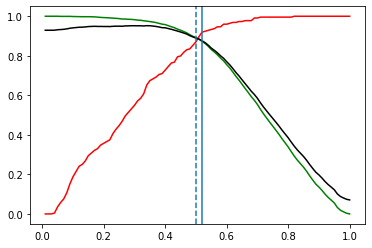

In [77]:
import numpy as np
thresh = list(np.linspace(0.01,1,100))
plt.plot(thresh,tp,color='green')
plt.plot(thresh, tn, color='red')
plt.plot(thresh, overall_acc, color='black')
plt.axvline(0.52)
plt.axvline(0.5, linestyle='dashed')

In [78]:
X.shape

(7189, 8106)

In [ ]:
# preprocess



In [193]:
#testing on a hateful instance
X_train_hate_test = X_train_hate
X_train_hate_test = X_train_hate_test.drop(['labelxyz'], axis = 1)
X_train_hate_test.iloc[[0]]
yhat = log_reg.predict(X_train_hate_test.iloc[[19]])
print(yhat)


[0]


In [170]:
# extract model here




sample_input = "This is a test to predict if this is abusive or not." 
sample_input = [sample_input]
sample_input
#The above needs to be preprocessed but we won't do that yet

vectorizer2 = TfidfVectorizer()
Xtest = vectorizer2.fit_transform(sample_input)
denseTest = Xtest.todense()
denseTestlist = denseTest.tolist()
featurenamesTest = vectorizer2.get_feature_names()
featurenamesTest

df_test = pd.DataFrame(denseTestlist, columns=featurenamesTest)

#stackoverflow answer below

not_existing_cols = [c for c in df2.columns.tolist() if c not in df_test]
df_test = df_test.reindex(df_test.columns.tolist() + not_existing_cols, axis=1)
df_test.fillna(0, inplace = True)
df_test = df_test[df2.columns.tolist()] # use the original X structure as mask for the new inference dataframe
df_test
yhat = log_reg.predict(df_test)
print(log_reg.predict_proba(df_test))
print(yhat)

In [94]:
#save model to pickle object 
import pickle

#vectorizer.get_feature_names()

In [172]:
print(yhat)

[0]


In [146]:
vectorizer = TfidfVectorizer() #i have this
X = vectorizer.fit_transform(corpus) # i have this
feature_names = vectorizer.get_feature_names() # i have this
dense = X.todense()
denselist = dense.tolist()
df2 = pd.DataFrame(denselist, columns=feature_names)
df2

,090531156,11thmonthsari,13479,150202,1stsoloalbumleejonghyun,2016in4a,2016in4word,2016in4worda,2016in4wordsa,2016in4world,...,zodiac,zoe,zone,zoo,zoom,zoon,zorro,zucchini,zurich,zzz
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [163]:
df2['a']

KeyError: 'a'

In [292]:
from sklearn.ensemble import RandomForestClassifier

In [293]:
rand_clf = RandomForestClassifier()
rand_clf.fit(X_train, y_train)
predict = rand_clf.predict(X_test)
accuracy_score(y_test, predict)

c:\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8944723618090452

In [294]:
confusion_matrix(y_test, predict)

array([[2659,  301],
       [  35,  189]], dtype=int64)

In [295]:
189/(189+35)

0.84375

In [296]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
predict_dt = dt_clf.predict(X_test)
accuracy_score(y_test, predict_dt)

0.8426507537688442

In [297]:
confusion_matrix(y_test, predict_dt)

array([[2502,  458],
       [  43,  181]], dtype=int64)

In [298]:
195/224

0.8705357142857143

In [299]:
from sklearn.ensemble import GradientBoostingClassifier
grad_clf = GradientBoostingClassifier()
grad_clf.fit(X_train, y_train)
predict_grad = grad_clf.predict(X_test)
accuracy_score(y_test, predict_grad)

0.925251256281407

In [300]:
confusion_matrix(y_test, predict_grad)

array([[2792,  168],
       [  70,  154]], dtype=int64)

In [301]:
144/224

0.6428571428571429

In [302]:
decisions = (log_reg.predict_proba(X_test) >= 0.5).astype(int)
p = []
for j in range(len(y_test)):
    p.append(1 - decisions[j][0])

In [303]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print('Logistic Regression Score: ', roc_auc_score(y_test, p))
print('Naive Bayes Score: ', roc_auc_score(y_test, predict_nav))
print('Random Forest Score: ', roc_auc_score(y_test, predict))
print('Decision Tree Score: ', roc_auc_score(y_test, predict_dt))
print('Grad Boosting Score: ', roc_auc_score(y_test, predict_grad))



Logistic Regression Score:  0.893351833976834
Naive Bayes Score:  0.7568170849420849
Random Forest Score:  0.8710304054054053
Decision Tree Score:  0.8266529922779924
Grad Boosting Score:  0.8153716216216216


In [304]:
from sklearn.metrics import roc_curve

log_fpr, log_tpr, threshold = roc_curve(y_test,p)
nav_fpr, nav_tpr, threshold = roc_curve(y_test, predict_nav)
rand_fpr, rand_tpr, thresold = roc_curve(y_test, predict)
dt_fpr, dt_tpr, threshold = roc_curve(y_test, predict_dt)
grad_fpr, grad_tpr, threshold = roc_curve(y_test, predict_grad)

#nav_fpr, nav_tpr, nav_threshold = roc_curve(y_train, naives_y_scores)

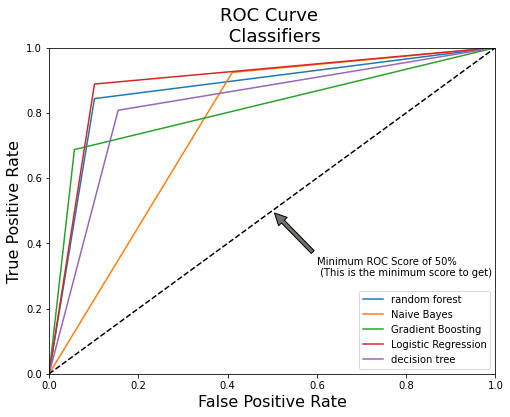

In [305]:
def graph_roc_curve_multiple(rand_fpr, rand_tpr, nav_fpr, nav_tpr,grad_fpr, grad_tpr, log_fpr, log_tpr, dt_fpr, dt_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Classifiers', fontsize=18)
    plt.plot(rand_fpr, rand_tpr, label='random forest')
    plt.plot(nav_fpr, nav_tpr, label='Naive Bayes')
    plt.plot(grad_fpr, grad_tpr, label='Gradient Boosting')
    plt.plot(log_fpr, log_tpr, label='Logistic Regression')
    plt.plot(dt_fpr, dt_tpr, label='decision tree')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(rand_fpr, rand_tpr, nav_fpr, nav_tpr,grad_fpr, grad_tpr, log_fpr, log_tpr, dt_fpr, dt_tpr)
plt.show()

In [306]:

#simple bow
#bow with 100 words
#bigram+tfidf
#rocauc

In [307]:
#tfidf with top 100 words

In [308]:
words = []
for k in range(len(corpus)):
    tweet_k = corpus[k].split(" ")
    for m in range(len(tweet_k)):
        words.append(tweet_k[m])
from collections import Counter
counter_obj = Counter(words)
top100 = counter_obj.most_common(1000)
top100words = []
for i in range(len(top100)):
    top100words.append(top100[i][0])

In [309]:
tdftop = df2
lst3 = [value for value in list(tdftop.columns) if value in top100words] 
tdf100 = tdftop[lst3]
tdf100['labelxyz'] = list(ds.label)
tdf_hate = tdf100[tdf100.labelxyz == 1]
tdf_nonhate = tdf100[tdf100.labelxyz == 0]
X_train_hate = tdf_hate.sample(frac=0.9, random_state=0)
X_test_hate = tdf_hate.drop(X_train_hate.index)
X_train_nonhate =  tdf_nonhate.sample(frac=0.406, random_state=0)
X_test_nonhate = tdf_nonhate.drop(X_train_nonhate.index)
X_train_df = pd.concat([X_train_hate, X_train_nonhate], axis = 0)
X_train = X_train_df.drop(['labelxyz'], axis = 1)
y_train = list(X_train_df.labelxyz)
X_test_df = pd.concat([X_test_hate, X_test_nonhate], axis = 0)
X_test = X_test_df.drop(['labelxyz'], axis = 1)
y_test = list(X_test_df.labelxyz)

c:\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [310]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
log_reg =  LogisticRegression()

log_reg.fit(X_train, y_train)
tp = []
tn = []
overall_acc = []
for i in range(100):
    threshold = (i+1)/100
    decisions = (log_reg.predict_proba(X_test) >= threshold).astype(int)
    p = []
    for j in range(len(y_test)):
        p.append(1 - decisions[j][0])
    conf = confusion_matrix(y_test,p)
    tp.append(conf[0][0]/(conf[0][0] + conf[0][1]))
    tn.append(conf[1][1]/(conf[1][1] + conf[1][0]))
    overall_acc.append((conf[0][0] + conf[1][1])/len(y_test))

c:\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


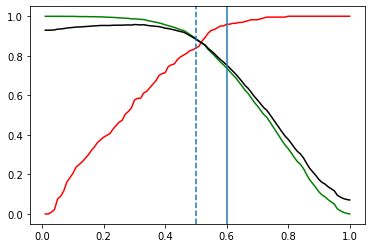

In [311]:
import matplotlib.pyplot as plt
import numpy as np
thresh = list(np.linspace(0.01,1,100))
plt.plot(thresh,tp,color='green')
plt.plot(thresh, tn, color='red')
plt.plot(thresh, overall_acc, color='black')
plt.axvline(0.6)
plt.axvline(0.5, linestyle='dashed')

In [312]:
plt.show()

In [313]:
#other models
from sklearn.metrics import accuracy_score
nav_clf.fit(X_train, y_train)
predict_nav = nav_clf.predict(X_test)
print('naive bayes')
print(accuracy_score(y_test, predict_nav))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict_nav))

rand_clf = RandomForestClassifier()
rand_clf.fit(X_train, y_train)
predict = rand_clf.predict(X_test)
print('random forest')
print(accuracy_score(y_test, predict))
print(confusion_matrix(y_test, predict))

dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
predict_dt = dt_clf.predict(X_test)
print('decision tree')
print(accuracy_score(y_test, predict_dt))
print(confusion_matrix(y_test, predict_nav))

from sklearn.ensemble import GradientBoostingClassifier
grad_clf = GradientBoostingClassifier()
grad_clf.fit(X_train, y_train)
print('gradient boosting')
predict_grad = grad_clf.predict(X_test)
print(accuracy_score(y_test, predict_grad))
print(confusion_matrix(y_test, predict_grad))

naive bayes
0.7258165829145728
[[2102  858]
 [  15  209]]


c:\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


random forest
0.8555276381909548
[[2542  418]
 [  42  182]]
decision tree
0.7996231155778895
[[2102  858]
 [  15  209]]
gradient boosting
0.9258793969849246
[[2793  167]
 [  69  155]]


In [314]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predict_log = log_reg.predict(X_test)
accuracy_score(y_test, predict_log)

c:\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8831658291457286

In [315]:
print(confusion_matrix(y_test, predict_log))

[[2624  336]
 [  36  188]]


In [316]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print('Logistic Regression Score: ', roc_auc_score(y_test, p))
print('Naive Bayes Score: ', roc_auc_score(y_test, predict_nav))
print('Random Forest Score: ', roc_auc_score(y_test, predict))
print('Decision Tree Score: ', roc_auc_score(y_test, predict_dt))
print('Grad Boosting Score: ', roc_auc_score(y_test, predict_grad))

Logistic Regression Score:  0.5
Naive Bayes Score:  0.8215854247104248
Random Forest Score:  0.8356418918918918
Decision Tree Score:  0.8014478764478764
Grad Boosting Score:  0.8177726833976833


In [317]:
from sklearn.metrics import roc_curve

log_fpr, log_tpr, threshold = roc_curve(y_test,p)
nav_fpr, nav_tpr, threshold = roc_curve(y_test, predict_nav)
rand_fpr, rand_tpr, thresold = roc_curve(y_test, predict)
dt_fpr, dt_tpr, threshold = roc_curve(y_test, predict_dt)
grad_fpr, grad_tpr, threshold = roc_curve(y_test, predict_grad)

#nav_fpr, nav_tpr, nav_threshold = roc_curve(y_train, naives_y_scores)

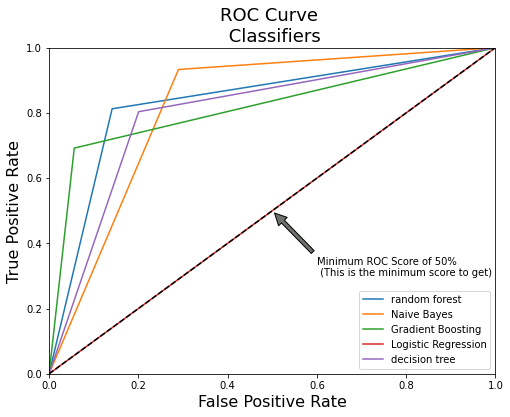

In [318]:
def graph_roc_curve_multiple(rand_fpr, rand_tpr, nav_fpr, nav_tpr,grad_fpr, grad_tpr, log_fpr, log_tpr, dt_fpr, dt_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Classifiers', fontsize=18)
    plt.plot(rand_fpr, rand_tpr, label='random forest')
    plt.plot(nav_fpr, nav_tpr, label='Naive Bayes')
    plt.plot(grad_fpr, grad_tpr, label='Gradient Boosting')
    plt.plot(log_fpr, log_tpr, label='Logistic Regression')
    plt.plot(dt_fpr, dt_tpr, label='decision tree')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(rand_fpr, rand_tpr, nav_fpr, nav_tpr,grad_fpr, grad_tpr, log_fpr, log_tpr, dt_fpr, dt_tpr)
plt.show()

In [319]:
#BAG Of WORDS

In [320]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus)
bow = pd.DataFrame(X.toarray(), columns = cv.get_feature_names())

In [321]:
bow['labelxyz'] = list(ds.label)

In [322]:
bow_hate = bow[bow.labelxyz == 1]
bow_nonhate = bow[bow.labelxyz == 0]
X_train_hate = bow_hate.sample(frac=0.9, random_state=0)
X_test_hate = bow_hate.drop(X_train_hate.index)
X_train_nonhate =  bow_nonhate.sample(frac=0.406, random_state=0)
X_test_nonhate = bow_nonhate.drop(X_train_nonhate.index)
X_train_df = pd.concat([X_train_hate, X_train_nonhate], axis = 0)
X_train = X_train_df.drop(['labelxyz'], axis = 1)
y_train = list(X_train_df.labelxyz)
X_test_df = pd.concat([X_test_hate, X_test_nonhate], axis = 0)
X_test = X_test_df.drop(['labelxyz'], axis = 1)
y_test = list(X_test_df.labelxyz)

In [323]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

c:\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [324]:
tp = []
tn = []
overall_acc = []
for i in range(100):
    threshold = (i+1)/100
    decisions = (log_reg.predict_proba(X_test) >= threshold).astype(int)
    p = []
    for j in range(len(y_test)):
        p.append(1 - decisions[j][0])
    conf = confusion_matrix(y_test,p)
    tp.append(conf[0][0]/(conf[0][0] + conf[0][1]))
    tn.append(conf[1][1]/(conf[1][1] + conf[1][0]))
    overall_acc.append((conf[0][0] + conf[1][1])/len(y_test))

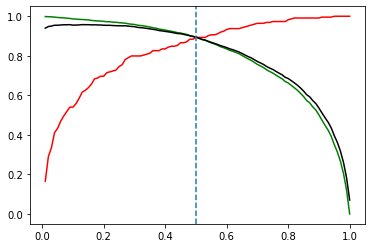

In [325]:
import numpy as np
thresh = list(np.linspace(0.01,1,100))
plt.plot(thresh,tp,color='green')
plt.plot(thresh, tn, color='red')
plt.plot(thresh, overall_acc, color='black')
#plt.axvline(0.6)
plt.axvline(0.5, linestyle='dashed')

In [326]:
from sklearn.metrics import accuracy_score
nav_clf.fit(X_train, y_train)
predict_nav = nav_clf.predict(X_test)
print('naive bayes')
print(accuracy_score(y_test, predict_nav))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict_nav))

rand_clf = RandomForestClassifier()
rand_clf.fit(X_train, y_train)
predict = rand_clf.predict(X_test)
print('random forest')
print(accuracy_score(y_test, predict))
print(confusion_matrix(y_test, predict))

dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
predict_dt = dt_clf.predict(X_test)
print('decision tree')
print(accuracy_score(y_test, predict_dt))
print(confusion_matrix(y_test, predict_nav))

from sklearn.ensemble import GradientBoostingClassifier
grad_clf = GradientBoostingClassifier()
grad_clf.fit(X_train, y_train)
print('gradient boosting')
predict_grad = grad_clf.predict(X_test)
print(accuracy_score(y_test, predict_grad))
print(confusion_matrix(y_test, predict_grad))

naive bayes
0.5681532663316583
[[1593 1367]
 [   8  216]]


c:\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


random forest
0.9073492462311558
[[2701  259]
 [  36  188]]
decision tree
0.8388819095477387
[[1593 1367]
 [   8  216]]
gradient boosting
0.9246231155778895
[[2790  170]
 [  70  154]]


In [327]:
143/224

0.6383928571428571

In [328]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predict_log = log_reg.predict(X_test)
accuracy_score(y_test, predict_log)

c:\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.894786432160804

In [329]:
print(confusion_matrix(y_test, predict_log))

[[2649  311]
 [  24  200]]


In [330]:
y_train[-1]+5

5

In [331]:
decisions = (log_reg.predict_proba(X_test) >= 0.5).astype(int)
p = []
for j in range(len(y_test)):
    p.append(1 - decisions[j][0])
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print('Logistic Regression Score: ', roc_auc_score(y_test, p))
print('Naive Bayes Score: ', roc_auc_score(y_test, predict_nav))
print('Random Forest Score: ', roc_auc_score(y_test, predict))
print('Decision Tree Score: ', roc_auc_score(y_test, predict_dt))
print('Grad Boosting Score: ', roc_auc_score(y_test, predict_grad))


Logistic Regression Score:  0.8938947876447877
Naive Bayes Score:  0.7512306949806951
Random Forest Score:  0.8758928571428573
Decision Tree Score:  0.830815637065637
Grad Boosting Score:  0.8150337837837838


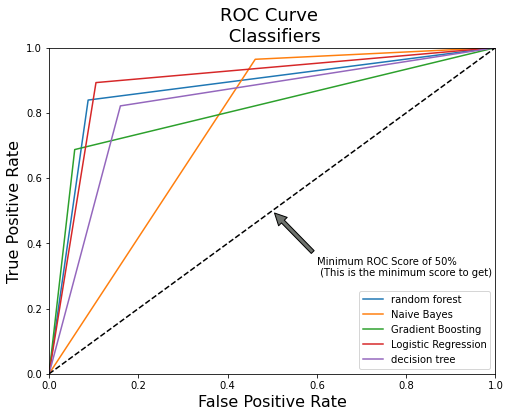

In [332]:
from sklearn.metrics import roc_curve

log_fpr, log_tpr, threshold = roc_curve(y_test,p)
nav_fpr, nav_tpr, threshold = roc_curve(y_test, predict_nav)
rand_fpr, rand_tpr, thresold = roc_curve(y_test, predict)
dt_fpr, dt_tpr, threshold = roc_curve(y_test, predict_dt)
grad_fpr, grad_tpr, threshold = roc_curve(y_test, predict_grad)

#nav_fpr, nav_tpr, nav_threshold = roc_curve(y_train, naives_y_scores)

def graph_roc_curve_multiple(rand_fpr, rand_tpr, nav_fpr, nav_tpr,grad_fpr, grad_tpr, log_fpr, log_tpr, dt_fpr, dt_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Classifiers', fontsize=18)
    plt.plot(rand_fpr, rand_tpr, label='random forest')
    plt.plot(nav_fpr, nav_tpr, label='Naive Bayes')
    plt.plot(grad_fpr, grad_tpr, label='Gradient Boosting')
    plt.plot(log_fpr, log_tpr, label='Logistic Regression')
    plt.plot(dt_fpr, dt_tpr, label='decision tree')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(rand_fpr, rand_tpr, nav_fpr, nav_tpr,grad_fpr, grad_tpr, log_fpr, log_tpr, dt_fpr, dt_tpr)
plt.show()

In [ ]:
# THE FOLOLWING IS GIVING ISSUES !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [ ]:
pip install graphviz

In [ ]:
import graphviz

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [ ]:
#pip install pydotplus

In [ ]:
from sklearn.externals.six import StringIO  
#to use above downgrade sklearn with the following code:
# pip install --upgrade scikit-learn==0.20.3

from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [ ]:
dot_data = StringIO()
export_graphviz(dt_clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
graph = Source(tree.export_graphviz(dt_clf, out_file=None
   , feature_names=list(X_train.columns), class_names=['0', '1'] 
   , filled = True))

In [ ]:
display(SVG(graph.pipe(format='svg')))

In [ ]:
pip install git+https://github.com/nekoumei/dtreeplt.git -U

In [ ]:
import dtreeplt
from dtreeplt import dtreeplt
dtree = dtreeplt(
    model=model,
    feature_names=list(X_train.columns),
    target_names=list(y_train)
)
fig = dtree.view()

In [ ]:
dot_data = tree.export_graphviz(dt_clf,
                                feature_names=list(X_train.columns),
                                out_file=None,
                                filled=True,
                                rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)

In [ ]:
import collections
colors = ('turquoise', 'orange')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

#graph.write_png('tree.png')

In [ ]:
graph.write_pdf("iris.pdf")

In [333]:
# THE ABOVE IS GIVING ISSUES !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [334]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train, y_train)

c:\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [335]:
print(model.feature_importances_)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
 0.00000000e+00 7.95421048e-05]


In [336]:
importances = rand_clf.feature_importances_

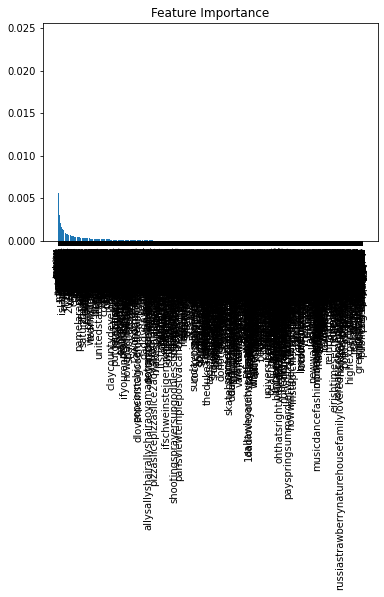

In [337]:
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)

# Show plot
plt.show()

In [338]:
indices

array([7432, 7898, 1853, ..., 5697, 3008,    0], dtype=int64)

In [339]:
importances

array([0.        , 0.        , 0.        , ..., 0.        , 0.        ,
       0.00015758])

In [340]:
names

['trump',
 'white',
 'day',
 'happi',
 'racist',
 'woman',
 'black',
 'hate',
 'life',
 'oil',
 'love',
 'racism',
 'thank',
 'librari',
 'allah',
 'smile',
 'amp',
 'obama',
 'presid',
 'might',
 'america',
 'summer',
 'latest',
 'comment',
 'father',
 'polit',
 'misogyni',
 'bigot',
 'weekend',
 'listen',
 'paladin',
 'race',
 'friday',
 'muslim',
 'saw',
 'ignor',
 'misogynist',
 'beauti',
 'anti',
 'stomp',
 'putin',
 'blk',
 'today',
 'orlando',
 'equal',
 'polic',
 'vote',
 'call',
 'south',
 'ord',
 'affirm',
 'like',
 'fuck',
 'final',
 'posit',
 'stop',
 'good',
 'say',
 'male',
 'add',
 'manga',
 'tweet',
 'tomorrow',
 'discrimin',
 'pay',
 'disgust',
 'nazi',
 'week',
 'think',
 'gold',
 'direct',
 'christma',
 'friend',
 'terror',
 'way',
 'babi',
 'right',
 'time',
 'would',
 'boycott',
 'music',
 'alright',
 'blacklist',
 'action',
 'healthi',
 'hatr',
 'semit',
 'kid',
 'matter',
 'bigotri',
 'rape',
 'whatev',
 'make',
 'via',
 'dad',
 'new',
 'year',
 'condemn',
 'girl

In [341]:
#bow with top n words

In [342]:
words = []
for k in range(len(corpus)):
    tweet_k = corpus[k].split(" ")
    for m in range(len(tweet_k)):
        words.append(tweet_k[m])


In [343]:
from collections import Counter

In [344]:
counter_obj = Counter(words)
top100 = counter_obj.most_common(1000)
top100words = []
for i in range(len(top100)):
    top100words.append(top100[i][0])

In [345]:
lst3 = [value for value in list(bow.columns) if value in top100words] 

In [346]:
bow100 = bow[lst3]

In [347]:
bow100['labelxyz'] = list(ds.label)
bow_hate = bow100[bow100.labelxyz == 1]
bow_nonhate = bow100[bow100.labelxyz == 0]
X_train_hate = bow_hate.sample(frac=0.9, random_state=0)
X_test_hate = bow_hate.drop(X_train_hate.index)
X_train_nonhate =  bow_nonhate.sample(frac=0.406, random_state=0)
X_test_nonhate = bow_nonhate.drop(X_train_nonhate.index)
X_train_df = pd.concat([X_train_hate, X_train_nonhate], axis = 0)
X_train = X_train_df.drop(['labelxyz'], axis = 1)
y_train = list(X_train_df.labelxyz)
X_test_df = pd.concat([X_test_hate, X_test_nonhate], axis = 0)
X_test = X_test_df.drop(['labelxyz'], axis = 1)
y_test = list(X_test_df.labelxyz)

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [348]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

c:\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [349]:
tp = []
tn = []
overall_acc = []
for i in range(100):
    threshold = (i+1)/100
    decisions = (log_reg.predict_proba(X_test) >= threshold).astype(int)
    p = []
    for j in range(len(y_test)):
        p.append(1 - decisions[j][0])
    conf = confusion_matrix(y_test,p)
    tp.append(conf[0][0]/(conf[0][0] + conf[0][1]))
    tn.append(conf[1][1]/(conf[1][1] + conf[1][0]))
    overall_acc.append((conf[0][0] + conf[1][1])/len(y_test))

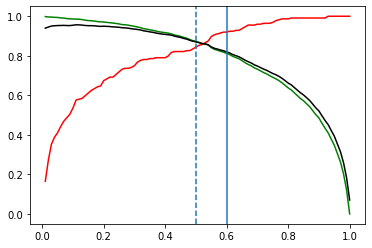

In [350]:
import numpy as np
thresh = list(np.linspace(0.01,1,100))
plt.plot(thresh,tp,color='green')
plt.plot(thresh, tn, color='red')
plt.plot(thresh, overall_acc, color='black')
plt.axvline(0.6)
plt.axvline(0.5, linestyle='dashed')

In [351]:
from sklearn.metrics import accuracy_score
nav_clf.fit(X_train, y_train)
predict_nav = nav_clf.predict(X_test)
print('naive bayes')
print(accuracy_score(y_test, predict_nav))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, predict_nav))

rand_clf = RandomForestClassifier()
rand_clf.fit(X_train, y_train)
predict = rand_clf.predict(X_test)
print('random forest')
print(accuracy_score(y_test, predict))
print(confusion_matrix(y_test, predict))

dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
predict_dt = dt_clf.predict(X_test)
print('decision tree')
print(accuracy_score(y_test, predict_dt))
print(confusion_matrix(y_test, predict_nav))

from sklearn.ensemble import GradientBoostingClassifier
grad_clf = GradientBoostingClassifier()
grad_clf.fit(X_train, y_train)
print('gradient boosting')
predict_grad = grad_clf.predict(X_test)
print(accuracy_score(y_test, predict_grad))
print(confusion_matrix(y_test, predict_grad))

naive bayes
0.6988065326633166
[[2015  945]
 [  14  210]]


c:\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


random forest
0.8495603015075377
[[2517  443]
 [  36  188]]
decision tree
0.7952261306532663
[[2015  945]
 [  14  210]]
gradient boosting
0.9214824120603015
[[2781  179]
 [  71  153]]


In [352]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
predict_log = log_reg.predict(X_test)
accuracy_score(y_test, predict_log)

c:\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8702889447236181

In [353]:
print(confusion_matrix(y_test, predict_log))

[[2582  378]
 [  35  189]]


In [354]:
decisions = (log_reg.predict_proba(X_test) >= 0.5).astype(int)
p = []
for j in range(len(y_test)):
    p.append(1 - decisions[j][0])
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

print('Logistic Regression Score: ', roc_auc_score(y_test, p))
print('Naive Bayes Score: ', roc_auc_score(y_test, predict_nav))
print('Random Forest Score: ', roc_auc_score(y_test, predict))
print('Decision Tree Score: ', roc_auc_score(y_test, predict_dt))
print('Grad Boosting Score: ', roc_auc_score(y_test, predict_grad))


Logistic Regression Score:  0.8580236486486487
Naive Bayes Score:  0.8091216216216216
Random Forest Score:  0.8448117760617762
Decision Tree Score:  0.8093991312741313
Grad Boosting Score:  0.8112813706563707


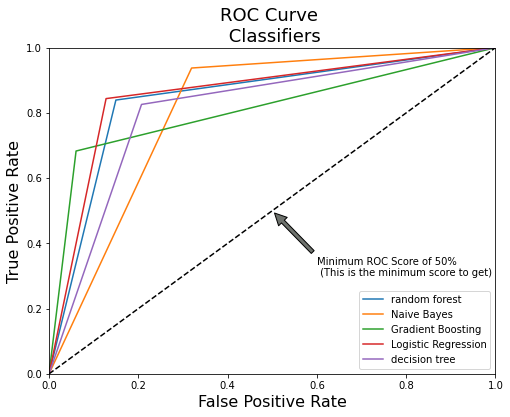

In [355]:
from sklearn.metrics import roc_curve

log_fpr, log_tpr, threshold = roc_curve(y_test,p)
nav_fpr, nav_tpr, threshold = roc_curve(y_test, predict_nav)
rand_fpr, rand_tpr, thresold = roc_curve(y_test, predict)
dt_fpr, dt_tpr, threshold = roc_curve(y_test, predict_dt)
grad_fpr, grad_tpr, threshold = roc_curve(y_test, predict_grad)

#nav_fpr, nav_tpr, nav_threshold = roc_curve(y_train, naives_y_scores)

def graph_roc_curve_multiple(rand_fpr, rand_tpr, nav_fpr, nav_tpr,grad_fpr, grad_tpr, log_fpr, log_tpr, dt_fpr, dt_tpr):
    plt.figure(figsize=(8,6))
    plt.title('ROC Curve \n Classifiers', fontsize=18)
    plt.plot(rand_fpr, rand_tpr, label='random forest')
    plt.plot(nav_fpr, nav_tpr, label='Naive Bayes')
    plt.plot(grad_fpr, grad_tpr, label='Gradient Boosting')
    plt.plot(log_fpr, log_tpr, label='Logistic Regression')
    plt.plot(dt_fpr, dt_tpr, label='decision tree')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(rand_fpr, rand_tpr, nav_fpr, nav_tpr,grad_fpr, grad_tpr, log_fpr, log_tpr, dt_fpr, dt_tpr)
plt.show()

In [356]:
#bigrams

In [357]:
import re

In [358]:
from nltk.util import ngrams

In [359]:
unigramList = []
for i in range(ds.shape[0]):
    s = ds.iloc[i][0]
    #s = str(s)
    s = s.lower()
    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    tokens = [token for token in s.split(" ") if token != ""]
    output = list(ngrams(tokens, 1))
    unigramList.append(output)

In [360]:
actualUnigramList = []
for i in range(len(unigramList)):
    #temp = []
    for j in range(len(unigramList[i])):
        actualUnigramList.append(" ".join(unigramList[i][j]))
    #actualBigramList.append(temp)

In [361]:
uniqueUnigramList = [] 
[uniqueUnigramList.append(x) for x in actualUnigramList if x not in uniqueUnigramList] 
uniqueUnigramList

['make',
 'sick',
 'yr',
 'idol',
 'georg',
 'bailey',
 'spoil',
 'choos',
 'potter',
 'greed',
 'lie',
 'misogyni',
 'learn',
 'fail',
 'krakow',
 'beauti',
 'go',
 'amp',
 'stay',
 'let',
 'u',
 'build',
 'love',
 'peac',
 'east',
 'european',
 'rel',
 'video',
 'men',
 'woman',
 'malay',
 'lee',
 'xxx',
 'pictur',
 'bangladeshi',
 'sex',
 'free',
 'hotlin',
 'number',
 'might',
 'librari',
 'saw',
 'liber',
 'polit',
 'graduat',
 'friend',
 'want',
 'forget',
 'rector',
 'islam',
 'sea',
 'shepherd',
 'supper',
 'racist',
 'anti',
 'racism',
 'man',
 'come',
 'last',
 'race',
 'declar',
 'winner',
 'putin',
 'choic',
 'puppet',
 'ret',
 'beta',
 'listen',
 'church',
 'kill',
 'thousand',
 'fascist',
 'credit',
 'la',
 'answer',
 'relat',
 'studi',
 'hate',
 'group',
 'kkt',
 'think',
 'struggl',
 'relev',
 'rise',
 'today',
 'stori',
 'polic',
 'brutal',
 'sikh',
 'templ',
 'vandalis',
 'calgari',
 'condemn',
 'act',
 'cycler',
 'elena',
 'enabl',
 'map',
 'statement',
 'great',
 'a

In [362]:
bigramList = []
for i in range(ds.shape[0]):
    s = ds.iloc[i][0]
    s = s.lower()
    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    tokens = [token for token in s.split(" ") if token != ""]
    output = list(ngrams(tokens, 2))
    bigramList.append(output)

In [363]:
#bigramList[0] - first tweet bigrams
#len(bigramList[0])
actualBigramList = []
for i in range(len(bigramList)):
    #temp = []
    for j in range(len(bigramList[i])):
        actualBigramList.append(" ".join(bigramList[i][j]))
    #actualBigramList.append(temp)
        
    

In [364]:
actualBigramList

['make sick',
 'sick yr',
 'yr idol',
 'idol georg',
 'georg bailey',
 'bailey spoil',
 'spoil choos',
 'choos potter',
 'potter greed',
 'greed lie',
 'lie misogyni',
 'misogyni learn',
 'learn fail',
 'krakow beauti',
 'beauti go',
 'go amp',
 'amp stay',
 'stay amp',
 'amp let',
 'let u',
 'u build',
 'build love',
 'love amp',
 'amp peac',
 'peac u',
 'u east',
 'east european',
 'european rel',
 'video men',
 'men woman',
 'woman malay',
 'malay lee',
 'lee xxx',
 'xxx pictur',
 'pictur bangladeshi',
 'sex free',
 'free sex',
 'sex hotlin',
 'hotlin number',
 'might librari',
 'librari librari',
 'librari saw',
 'saw liber',
 'liber polit',
 'graduat u',
 'u amp',
 'amp friend',
 'friend want',
 'want forget',
 'forget rector',
 'rector islam',
 'sea shepherd',
 'shepherd supper',
 'supper racist',
 'racist anti',
 'anti racism',
 'racism sea',
 'sea shepherd',
 'man come',
 'come last',
 'last race',
 'race declar',
 'declar winner',
 'winner putin',
 'putin choic',
 'choic putin

In [365]:
uniqueBigramList = [] 
[uniqueBigramList.append(x) for x in actualBigramList if x not in uniqueBigramList] 
uniqueBigramList

['make sick',
 'sick yr',
 'yr idol',
 'idol georg',
 'georg bailey',
 'bailey spoil',
 'spoil choos',
 'choos potter',
 'potter greed',
 'greed lie',
 'lie misogyni',
 'misogyni learn',
 'learn fail',
 'krakow beauti',
 'beauti go',
 'go amp',
 'amp stay',
 'stay amp',
 'amp let',
 'let u',
 'u build',
 'build love',
 'love amp',
 'amp peac',
 'peac u',
 'u east',
 'east european',
 'european rel',
 'video men',
 'men woman',
 'woman malay',
 'malay lee',
 'lee xxx',
 'xxx pictur',
 'pictur bangladeshi',
 'sex free',
 'free sex',
 'sex hotlin',
 'hotlin number',
 'might librari',
 'librari librari',
 'librari saw',
 'saw liber',
 'liber polit',
 'graduat u',
 'u amp',
 'amp friend',
 'friend want',
 'want forget',
 'forget rector',
 'rector islam',
 'sea shepherd',
 'shepherd supper',
 'supper racist',
 'racist anti',
 'anti racism',
 'racism sea',
 'man come',
 'come last',
 'last race',
 'race declar',
 'declar winner',
 'winner putin',
 'putin choic',
 'choic putin',
 'putin puppet

In [366]:
gramList12 = uniqueUnigramList + uniqueBigramList

In [367]:
trigramList = []
for i in range(ds.shape[0]):
    s = ds.iloc[i][0]
    s = s.lower()
    s = re.sub(r'[^a-zA-Z0-9\s]', ' ', s)
    tokens = [token for token in s.split(" ") if token != ""]
    output = list(ngrams(tokens, 3))
    trigramList.append(output)

In [368]:
actualTrigramList = []
for i in range(len(trigramList)):
    #temp = []
    for j in range(len(trigramList[i])):
        actualTrigramList.append(" ".join(trigramList[i][j]))
    #actualBigramList.append(temp)

In [369]:
uniqueTrigramList = [] 
[uniqueTrigramList.append(x) for x in actualTrigramList if x not in uniqueTrigramList] 
uniqueTrigramList

['make sick yr',
 'sick yr idol',
 'yr idol georg',
 'idol georg bailey',
 'georg bailey spoil',
 'bailey spoil choos',
 'spoil choos potter',
 'choos potter greed',
 'potter greed lie',
 'greed lie misogyni',
 'lie misogyni learn',
 'misogyni learn fail',
 'krakow beauti go',
 'beauti go amp',
 'go amp stay',
 'amp stay amp',
 'stay amp let',
 'amp let u',
 'let u build',
 'u build love',
 'build love amp',
 'love amp peac',
 'amp peac u',
 'peac u east',
 'u east european',
 'east european rel',
 'video men woman',
 'men woman malay',
 'woman malay lee',
 'malay lee xxx',
 'lee xxx pictur',
 'xxx pictur bangladeshi',
 'sex free sex',
 'free sex hotlin',
 'sex hotlin number',
 'might librari librari',
 'librari librari saw',
 'librari saw liber',
 'saw liber polit',
 'graduat u amp',
 'u amp friend',
 'amp friend want',
 'friend want forget',
 'want forget rector',
 'forget rector islam',
 'sea shepherd supper',
 'shepherd supper racist',
 'supper racist anti',
 'racist anti racism',


In [370]:
#replace the 2 in the end with 3 for trigrams
tfidf2 = TfidfVectorizer(vocabulary = uniqueBigramList, ngram_range=(1,2))

In [371]:
tfs2 = tfidf2.fit_transform(corpus)

In [375]:
dense

matrix([[0.278275  , 0.278275  , 0.278275  , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.36449337, 0.36449337,
         0.36449337]])

In [374]:
feature_names = tfidf2.get_feature_names()
dense = tfs2.todense()
denselist = dense.tolist()
df_bi = pd.DataFrame(denselist, columns=feature_names)
df_bi

MemoryError: 

In [ ]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_bi, list(ds.label), test_size=0.2)

In [ ]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train2, y_train2, cv=3)
log_reg_mean = log_scores.mean()


# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train2, y_train2, cv=3)
nav_mean = nav_scores.mean()


# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

In [ ]:
result_df

In [ ]:
from sklearn.metrics import accuracy_score
nav_clf.fit(X_train2, y_train2)
predict_nav = nav_clf.predict(X_test2)
accuracy_score(y_test2, predict_nav)

In [ ]:
log_reg.fit(X_train2, y_train2)
predict_log = log_reg.predict(X_test2)
accuracy_score(y_test2, predict_log)

In [ ]:
#simple bag of words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()
X = cv.fit_transform(corpus)

In [ ]:
X

In [ ]:
cv.get_feature_names()

In [ ]:
bow = pd.DataFrame(X.toarray(), columns = cv.get_feature_names())

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bow, list(ds.label), test_size=0.2)

In [ ]:
# Use Cross-validation.
from sklearn.model_selection import cross_val_score

# Logistic Regression
log_reg = LogisticRegression()
log_scores = cross_val_score(log_reg, X_train, y_train, cv=3)
log_reg_mean = log_scores.mean()


# Naives Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
nav_mean = nav_scores.mean()


# Create a Dataframe with the results.
d = {'Classifiers': ['Logistic Reg.', 'Naives Bayes'], 
    'Crossval Mean Scores': [log_reg_mean, nav_mean]}

result_df = pd.DataFrame(data=d)

In [ ]:
result_df

In [ ]:
log_reg.fit(X_train, y_train)
predict_log = log_reg.predict(X_test)
accuracy_score(y_test, predict_log)